# Logistic Regression
* How can we predict a categorical label?
    * Logistic Regression

* Logistic Regression is a **classification algorithm** designed to predict categorical target label.

* Interpreting Results
    * Odds Ratio and Coefficients
    * Classification Metrics
        * Accuracy
        * Precision
        * Recall
    * ROC Curves


## Finding The Best Fit
* The first step for maximum likelihood is to go from log odds back to probability :
    * ln(p/1-p)=ln(odds)

* Likelihood =Product of probablities of belongigng to class 1.
* While we are trying to **maximize** the likelihood,we still need something to **minimize**,since the computer's gradient descent methods can only search for minimums.

* Just as with Linear Regression,gradient descent can solve this for us.
* log odds and probability




* Features
    * age - Age of participant in years
    * physical_score - Score achieved during physical exam 
* Label/Target
    * test_result - 0 if no pass, 1 if test passed.

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("hearing_test.csv")

In [93]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [94]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [95]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

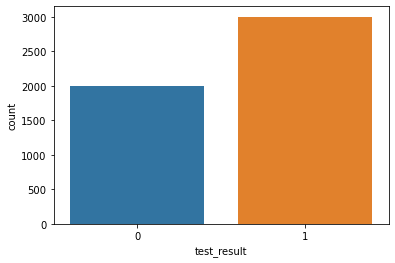

In [96]:
sns.countplot(data=df,x="test_result")

<AxesSubplot:xlabel='test_result', ylabel='age'>

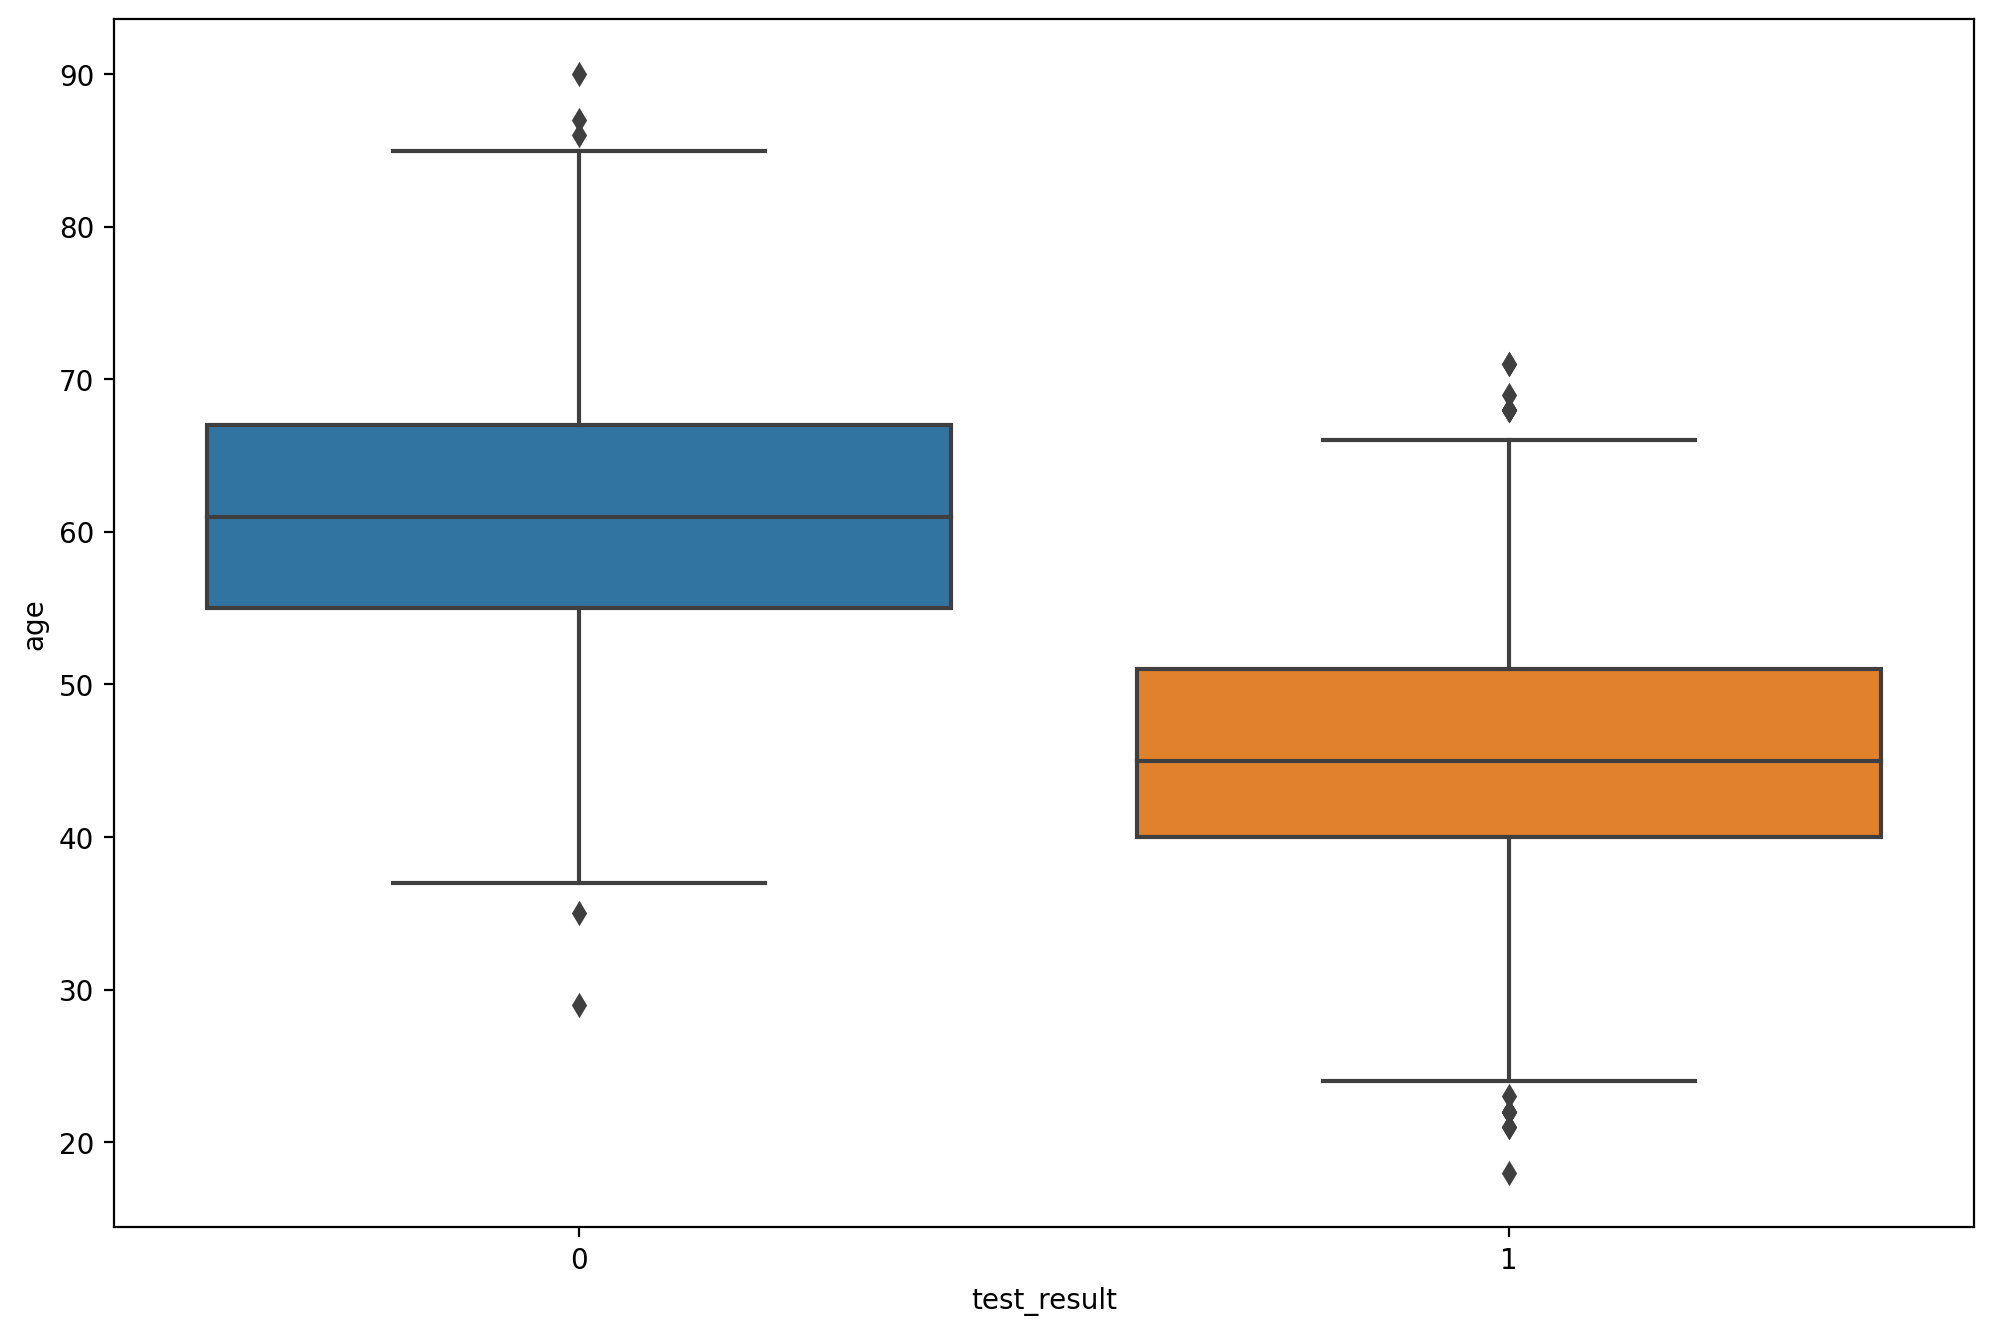

In [97]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(x="test_result",y="age",data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

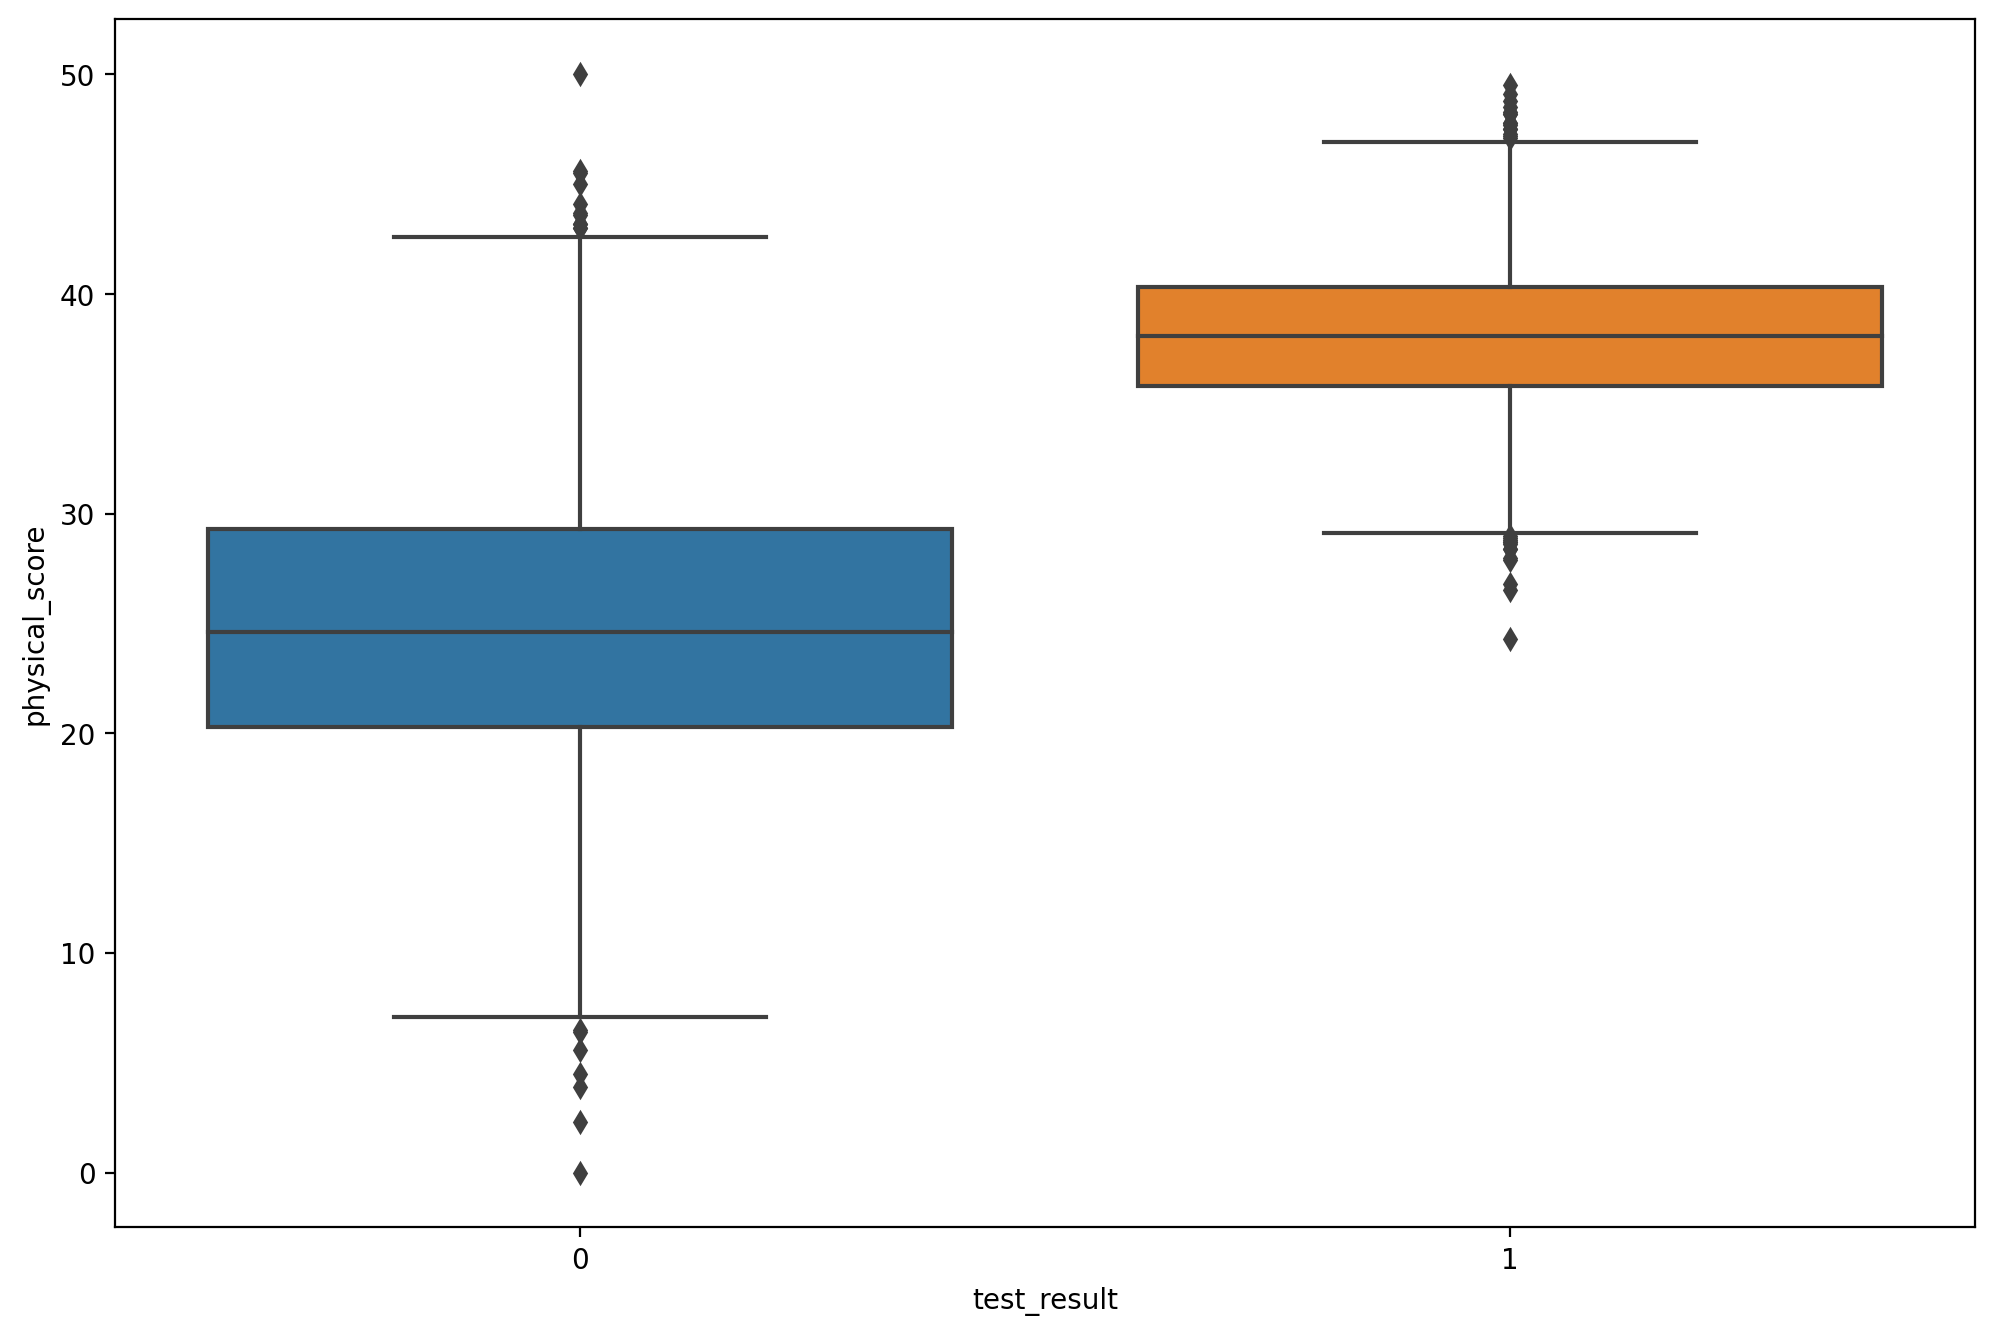

In [98]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(x="test_result",y="physical_score",data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

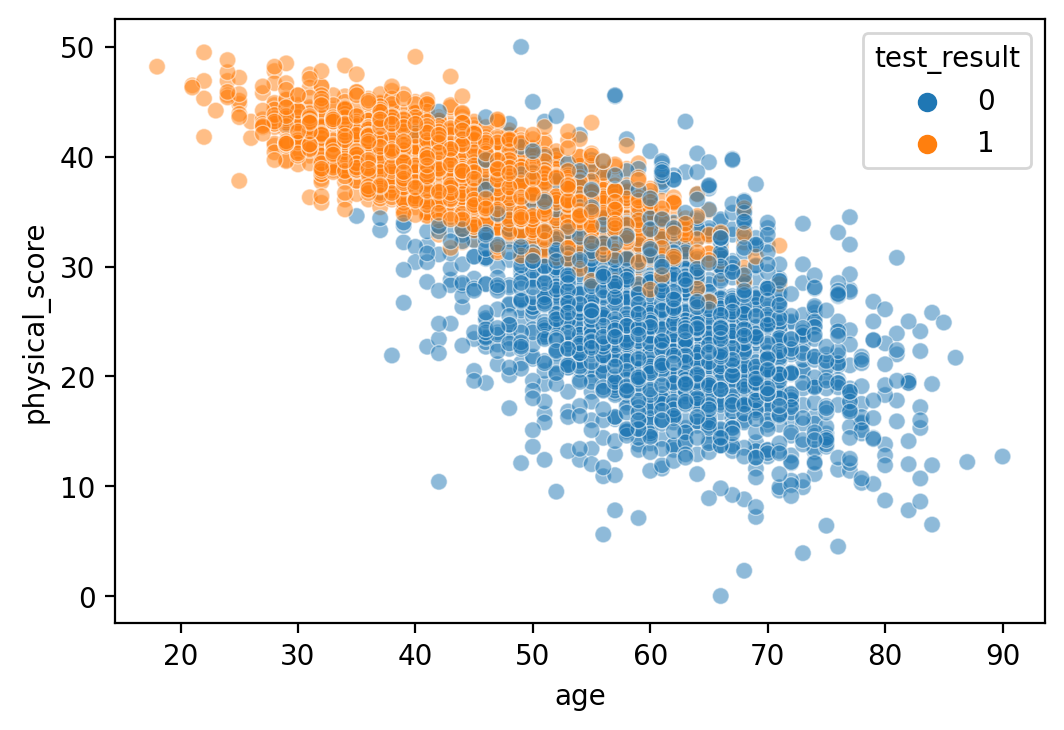

In [99]:
plt.figure(dpi=200)
sns.scatterplot(x="age",y="physical_score",data=df,hue="test_result",alpha=0.5)

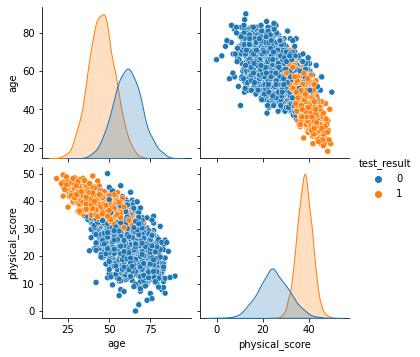

In [100]:
sns.pairplot(df,hue="test_result")

<AxesSubplot:>

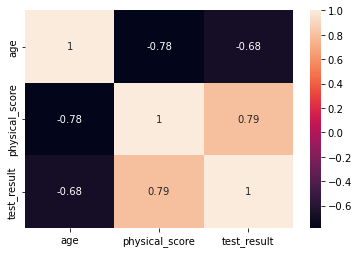

In [101]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

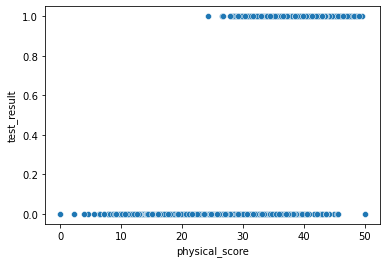

In [102]:
sns.scatterplot(x="physical_score",y="test_result",data=df)

In [103]:
from mpl_toolkits.mplot3d import Axes3D

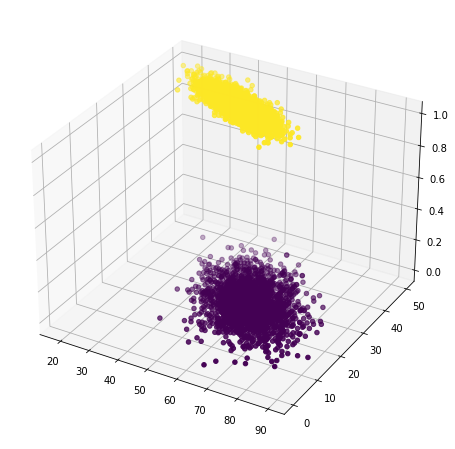

In [104]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(df["age"],df["physical_score"],df["test_result"],c=df["test_result"])

## Creating and Training Model

In [105]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [106]:
X=df.drop("test_result",axis=1)

In [107]:
y=df["test_result"]

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [111]:
scaler=StandardScaler()

In [112]:
scaled_X_train=scaler.fit_transform(X_train)

In [113]:
scaled_X_test=scaler.transform(X_test)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
log_model=LogisticRegression()

In [116]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [117]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [118]:
y_pred=log_model.predict(scaled_X_test)

In [119]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [120]:
y_pred=log_model.predict_proba(scaled_X_test)

In [121]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## Classification Metrics-Confusion Matrix and Accuracy

We've developed a test or model to detect presence of a virus infection in a person based on some biological feature.
* We could treat this as a Logistic Regression,predicting:
    - 0 - Not Infected (Tests Negative)
    - 1 - Infected (Tests Positive)

* There 4 possible outcomes:
    * Infected person test positive.
    * Healty person tests negative.
    * **Infected person tests negative.**
    * **Healty person test positive.**


![image](./confusion.png)


* Accuracy
    * How often is the model correct?

    Acc= (TP + TN)/Total

 ![image](./acc.png)

 (4+93)/100 = 97% Accuracy

***Real world data would reflect poor accuracy if a model always returned the same result.***

### Classification Performance Metrics : Precision and Recall

* Recall
* Precision
* F1-Score

**Recall** = (TP)/Total Actual Positives (4/5)=0.8

**Precision** = (TP)/Total predicted positives (4/6)

* Recall and Precision can help illuminate our performance specifically in regards to the relevant or positive case.

* Depending on the model,there is typically a trade-off between precision and recall,which we will explore later on with the ROC curve. 


**F1-Score** = (2 x precision x recall) /(precision + recall)

![image](./metrics.png)

## ROC Curves

* A perfect model would have a zero FPR.
* Random guessing is the red line
* Realistically with smaller data sets the ROC curves are not as smooth.
* **AUC** - Area Under the Curve,allows us to compare ROCs for different models.




In [122]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [123]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [125]:
y_pred=log_model.predict(scaled_X_test)

In [126]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [127]:
accuracy_score(y_test,y_pred)

0.93

In [128]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

In [129]:
from sklearn.metrics import plot_confusion_matrix

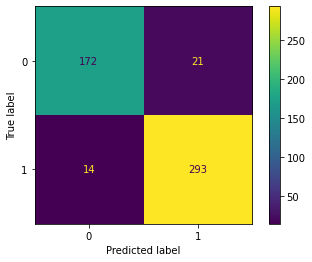

In [130]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

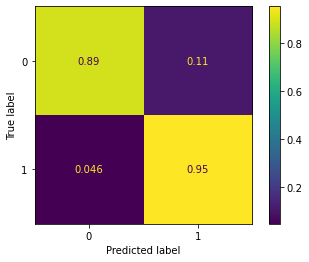

In [131]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize="true")

In [132]:
len(y_test)

500

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [134]:
from sklearn.metrics import precision_score,recall_score

In [135]:
precision_score(y_test,y_pred)

0.9331210191082803

In [136]:
recall_score(y_test,y_pred)

0.9543973941368078

In [137]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

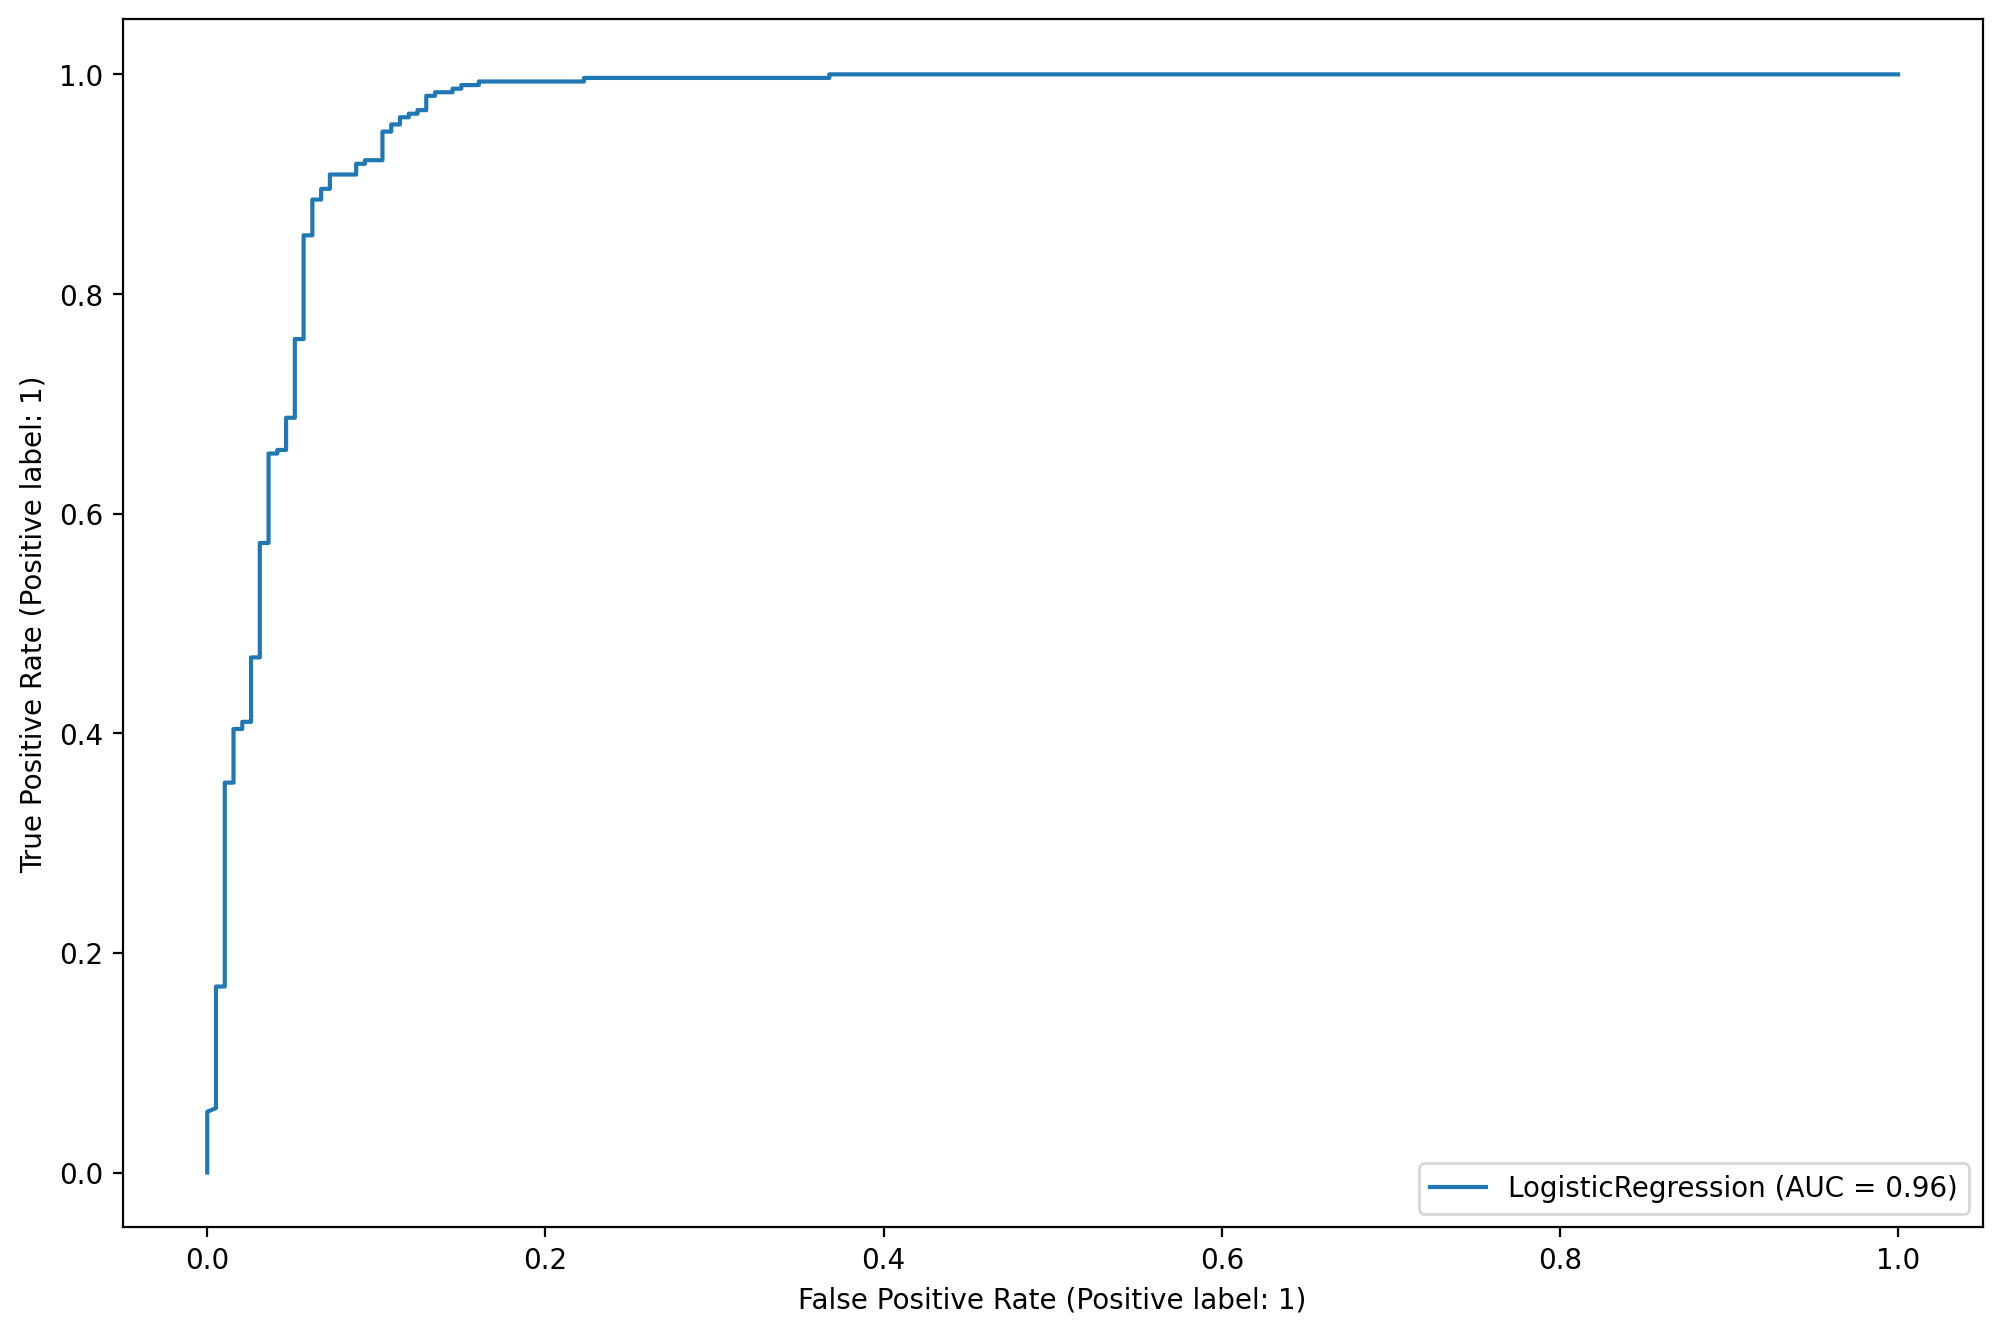

In [138]:
fig,ax=plt.subplots(figsize=(12,8),dpi=200)
plot_roc_curve(log_model,scaled_X_test,y_test,ax=ax)

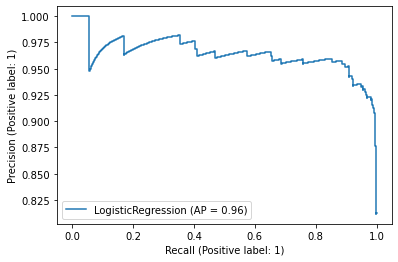

In [139]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [140]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [141]:
log_model.predict(scaled_X_test)[0]

1

In [142]:
y_test[0]

1

## MultiClass Classification -Data and EDA

In [143]:
df =pd.read_csv("./iris.csv")

In [144]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [146]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [147]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

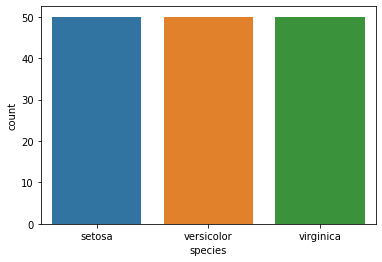

In [148]:
sns.countplot(x="species",data=df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

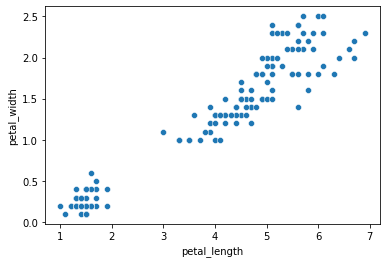

In [149]:
sns.scatterplot(x="petal_length",y="petal_width",data=df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

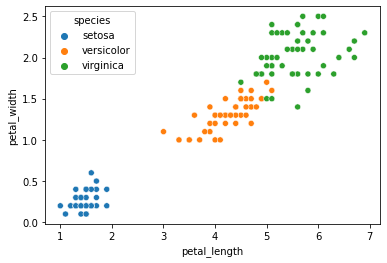

In [150]:
sns.scatterplot(x="petal_length",y="petal_width",data=df,
hue="species")

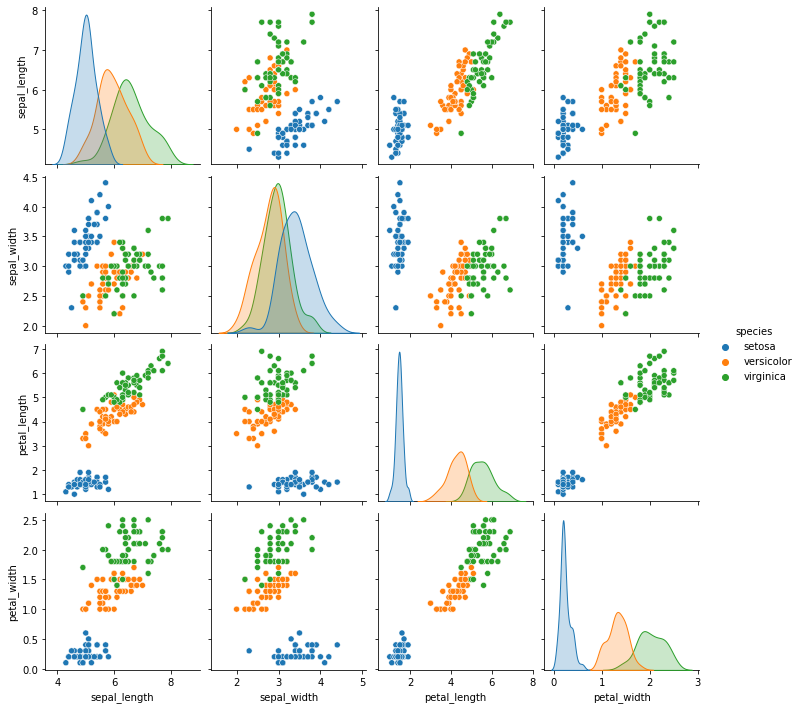

In [151]:
sns.pairplot(df,hue="species")

<AxesSubplot:>

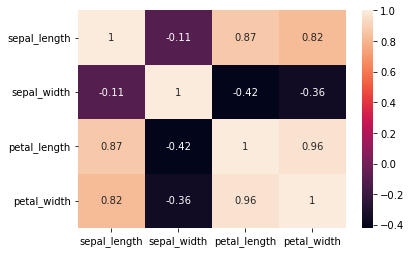

In [152]:
sns.heatmap(df.corr(),annot=True)

In [153]:
X=df.drop("species",axis=1)

In [154]:
y=df["species"]

In [155]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [157]:
scaler=StandardScaler()

In [158]:
scaled_X_train=scaler.fit_transform(X_train)

In [159]:
scaled_X_test=scaler.transform(X_test)

### Training and Performance Evaluation